# Graph embedding

_Deadline is yesterday!_

We shall use Node2Vec as a tool to study the connections between characters of "Les Misérables" by Victor Hugo. First we install package ```node2vec```.

In [ ]:
!conda install node2vec

Then we import our usual friends (adding our new friend)

In [10]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from node2vec import Node2Vec

Then we load the graph.

In [11]:
graph=nx.read_gml('lesmis.gml')

Now we can run the algorithm node2vec. This algorithm perfoms a specified number of random walks (of a specified length). Parameters ```p``` and ```q``` rule the behaviour of random walks.

In [18]:
node2vec = Node2Vec(graph, dimensions=20, walk_length=50,num_walks=10,p=1,q=1)

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]


We then give these random walks to the algorithm Word2Vec to get an embedding of each node.

In [19]:
model = node2vec.fit(window=10, min_count=1)

Now, each node is associated with a vector of real numbers.

In [20]:
model.wv.get_vector('Javert')

array([-0.5334754 , -0.3881075 ,  0.81360924,  0.5951413 ,  0.32729116,
       -0.44674373, -0.07405547,  0.2478086 , -0.10672326,  0.0626025 ,
        0.4657666 , -0.59012395,  0.16970167, -0.02917699,  0.56338966,
       -0.2352376 , -0.18098205,  0.38214725, -0.30162117, -0.18512192],
      dtype=float32)

We can check the similarity between two nodes with this function (or just do the scalar product of the vectors)

In [15]:
model.wv.similarity('Javert','Fantine')

0.61810267

Let us now look at the similarity of original edges of the graph.

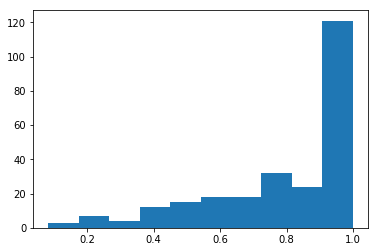

In [16]:
sim_list=[]
for u,v in graph.edges():
    sim_list.append(model.wv.similarity(u,v))

a = plt.hist(sim_list)

And have a look at similarity of non-edges.

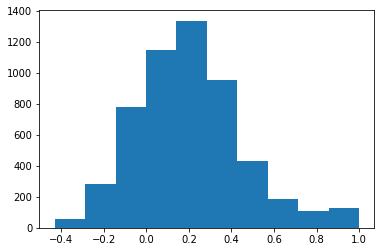

In [17]:
unsim_list=[]
for u in graph.nodes():
    for v in graph.nodes():
        if not((u,v) in graph.edges()):
            unsim_list.append(model.wv.similarity(u,v))

a = plt.hist(unsim_list)

### Task

Implement a function that gives for any threshold the proportion of good guess (false positive, true positive, false negative, true negative) if we were to say that similarity above is an edge and below is a none-edge. What is the optimal value of this parameter? Use your knowledge from other courses.

### Task

Now from your vectors (for each node), you can build another product to get a new vector. For example let us use Hadamard product (coordinate by coordinate). Use this and your knowledge to do binary classification.